In [2]:
import os
import random

import numpy as np
from PIL import Image
from pathlib import Path

import matplotlib.pyplot as plt

In [3]:
def read_tiff(path, n_images):
    """
    path - Path to the multipage-tiff file
    n_images - Number of pages in the tiff file
    """
 
    img = Image.open(path)
    #images = np.array()
    images = []
    for i in range(n_images):
        try:
            img.seek(i)

            #np.stack(images, np.array(img))
            images.append(np.array(img))

        except EOFError:
            # Not enough frames in img
            break

    return np.array(images)

In [4]:
path = Path('/Users/aleksejersov/Documents/data/medaka/data/Medaka_101_1/')

In [24]:
vol= read_tiff(path / 'vol.tif', 348)


In [6]:
seg = read_tiff(path / 'seg.tif', 348)

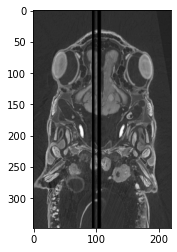

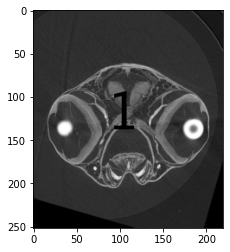

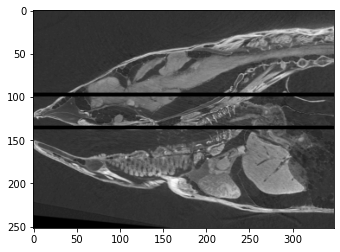

In [7]:
plt.imshow(vol[:, 100, :], cmap='gray')
plt.show()

plt.imshow(vol[100, :, :], cmap='gray')
plt.show()

plt.imshow(np.flipud(np.rot90(vol[:, :, 100])), cmap='gray')
plt.show()

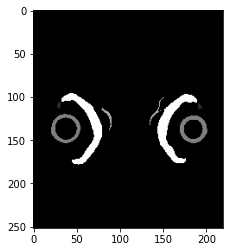

In [8]:
plt.imshow(seg[81], cmap='gray')

In [9]:
np.unique(seg)

array([0, 1, 3, 4, 5, 6], dtype=uint8)

In [10]:
def recolor_labels():
    pass


array([0, 1, 3, 4, 5, 6], dtype=uint8)

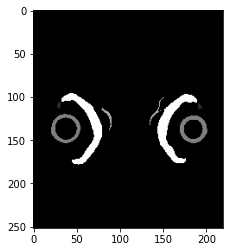

In [11]:
SLICE = 81

plt.imshow(seg[SLICE], cmap='gray')
np.unique(seg)

In [12]:
color = convert_label_to_color(seg[SLICE], recolor_dict)

NameError: name 'convert_label_to_color' is not defined

In [13]:

color = Image.fromarray(convert_label_to_color(seg[SLICE], recolor_dict), mode='RGB')

plt.imshow(color)
color.save('color.jpg', 'JPEG')

overlay = Image.blend(Image.fromarray(vol[SLICE]).convert('RGB'), color, alpha=0.3)
#np.unique(seg)

plt.imshow(overlay)
overlay.save('overlay.jpg', 'JPEG')

NameError: name 'convert_label_to_color' is not defined

# Generate gallery

In [29]:
recolor_dict = {'bg': {'label': 0, 'color':(0, 0, 0)},
                'iris': {'label': 1, 'color':(81, 7, 230)},
                'lens': {'label': 3, 'color':(107, 163, 237)},
                'muscles': {'label': 4, 'color':(219, 97, 64)},
                'nerve': {'label': 5, 'color':(245, 238, 140)},
                'retina': {'label': 6, 'color':(111, 153, 107)}
                }


views = {'front':0, 'top':1, 'side':2}

def convert_label_to_color(seg, recolor_params=None):

    #color = np.empty([3, seg.shape[0], seg.shape[1]])

    color = np.zeros((seg.shape[0],seg.shape[1],3), np.uint8)

    #if recolor_params == None:
    #    return

    for key in recolor_params:
        i = recolor_params[key]['label']
        c = recolor_params[key]['color']

        ind = np.where(seg == i)
        color[ind] = c

    return color




def make_gallery(volume, segmentation, params):

    gallery_path = params['gallery_path']
    every_slice = params['every_slice']
    sample_id = params['sample_id']

    if not os.path.exists(gallery_path):
        os.makedirs(gallery_path)

    for view in views.keys():

        for i in range(0, volume.shape[views[view]], every_slice):

            if view == 'front':
                slice_vol = volume[i,:,:]
                slice_seg = segmentation[i,:,:]
            elif view == 'top':
                slice_vol = volume[:,i,:]
                slice_seg = segmentation[:,i,:]
            else:
                slice_vol = np.flipud(np.rot90(volume[:,:,i]))
                slice_seg = np.flipud(np.rot90(segmentation[:,:,i]))

            colored_label = Image.fromarray(convert_label_to_color(slice_seg, recolor_dict), mode='RGB')
            overlay = Image.blend(Image.fromarray(slice_vol).convert('RGB'), colored_label, alpha=0.5)
    
            if not os.path.exists(gallery_path / sample_id / view):
                os.makedirs(gallery_path / sample_id / view)

            overlay.save(gallery_path / sample_id / view / f'overlay_{str(i).zfill(4)}.jpg', 'JPEG')

    return (int(volume.shape[0] / every_slice), int(volume.shape[1] / every_slice), int(volume.shape[2] / every_slice))


In [30]:
pathGalleryHTML = Path('/Users/aleksejersov/projects/measuring-repo/gallery/images/')

gallery_params = {
    'gallery_path': pathGalleryHTML,
    'sample_id': '',
    'every_slice': 5
    }

preview_images_count = make_gallery(vol,seg,gallery_params)
#preview_images_count

In [36]:

num = 4
step = 5

steps_number = 69

rows = 1
cols = 40

s = ''

n = 0

num_images = 22

lines = ['111', '222', '333']

for r in range(rows):

    s += '''<div class="row">\n'''

    for c in range(cols):


        #num = random.randint(0,steps_number)

        num = 15 + random.randint(-5,10)

        line = lines[random.randint(0,len(lines)-1)]
        ids= random.randint(1, 1000)

        s += f'''<div class="column {line}">
            <div class="container">
                <img id="image{n}" src="images/front/overlay_{str(num*step).zfill(4)}.jpg" style="width:100%" onclick="openModal({n});currentSlide({num})" class="hover-shadow cursor">

                <div class="slidecontainer">
                    
                    <input type="range" min="0" max="{steps_number}" value="{num}" class="slider" id="slider{n}" oninput="onSliderMove({n})">  
                </div>

                <div class="top-left">line:{line}</div>
                <div class="top-right">id:{ids}</div>
            </div>
        </div>\n'''

        n += 1 

    s += '''</div>\n\n'''

#print(s)

pathGalleryHTML = Path('/Users/aleksejersov/projects/measuring-repo/gallery/')

with open(pathGalleryHTML / 'gallery.html', "w") as text_file:
    text_file.write(s)



IndexError: list index out of range